In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

### 1. Train ELM model with a few known classes, say digits 1..5

In [2]:
from skelm import ELMClassifier
model = ELMClassifier().fit(X_train[y_train <= 5], y_train[y_train <= 5])
yh_test = model.predict(X_test)

SOLVER forget= False
SOLVER forget= False


ELM predicts known classes correctly

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

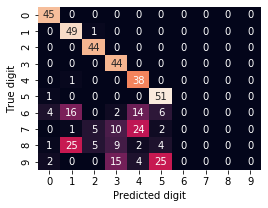

In [4]:
matplotlib.rcParams['figure.figsize'] = [4, 3]

from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test, yh_test)
ax = sn.heatmap(cm, annot=True, cbar=False)
ax.set(ylabel="True digit", xlabel="Predicted digit")

plt.savefig("cm1.pdf", bbox_inches='tight')

### 2. Let's teach ELM the new classes

SOLVER forget= False
SOLVER forget= False


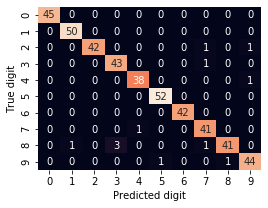

In [5]:
matplotlib.rcParams['figure.figsize'] = [4, 3]

model.partial_fit(X_train[y_train > 5], y_train[y_train > 5], update_classes=True)
yh2_test = model.predict(X_test)

cm2 = confusion_matrix(y_test, yh2_test)
ax = sn.heatmap(cm2, annot=True, cbar=False)
ax.set(ylabel="True digit", xlabel="Predicted digit")

plt.savefig("cm2.pdf", bbox_inches='tight')

### A previously trained ELM model was successfully updated with new classes!

### 3. Let's forget some training data

SOLVER forget= True
!!! forgetting
SOLVER forget= False


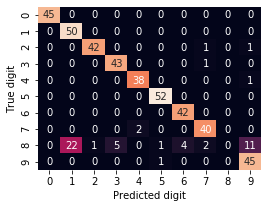

In [6]:
matplotlib.rcParams['figure.figsize'] = [4, 3]

model.partial_fit(X_train[y_train == 8], y_train[y_train == 8], forget=True)
yh3_test = model.predict(X_test)

cm3 = confusion_matrix(y_test, yh3_test)
ax = sn.heatmap(cm3, annot=True, cbar=False)
ax.set(ylabel="True digit", xlabel="Predicted digit")

plt.savefig("cm3.pdf", bbox_inches='tight')

#### ELM forgot digit 8 and does not predict it.

### Let's look at feature weights from out ELM

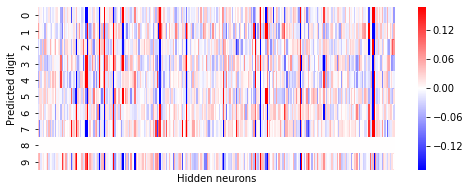

In [7]:
matplotlib.rcParams['figure.figsize'] = [8, 3]

ax = sn.heatmap(model.coef_.T, robust=True, cmap='bwr')
ax.set(ylabel="Predicted digit", xlabel="Hidden neurons", xticks=[])

plt.savefig("coeff.pdf", bbox_inches='tight')

ELM still has at output class for digit "8", but all it's weights are set to zero - because we removed all training data for it.

In [ ]:
import pandas
def to_parquest(filename, X):
    names = [str(i) for i in range(X.shape[1])]
    pandas.DataFrame(X, columns=names).to_parquet(filename, compression=None)

In [ ]:
from skelm import LargeELMRegressor
model = LargeELMRegressor(n_neurons=90000)
model.fit(input_file_list, target_file_list)